# Car Price Prediction Project

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

Dependent column : Selling_Price

Independent columns : Car_Name, Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission 

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [10]:
df.describe() #statistical analysis on only numerical columns

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Value_Counts()

In [11]:
df.Selling_Price.value_counts()

0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [14]:
195 + 106

301

In [15]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [16]:
239 + 60 + 2

301

In [17]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [18]:
261 + 40

301

In [19]:
df.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Honda Dream Yuga           1
Activa 4g                  1
Hero Honda Passion Pro     1
Hero Glamour               1
Bajaj Pulsar  NS 200       1
Name: Car_Name, Length: 98, dtype: int64

In [20]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [21]:
df.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

### Missing Values

In [22]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

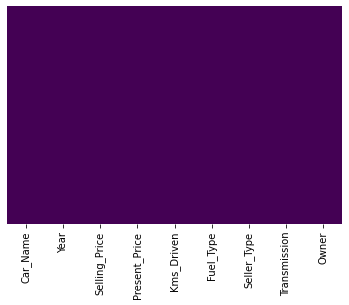

In [23]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)

### Creating new column i.e. year - present year

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df['Age_of_Car'] = 2021 - df['Year']

In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [27]:
df.Age_of_Car.value_counts()

6     61
5     50
7     38
4     35
8     33
9     23
10    19
11    15
13     7
12     6
16     4
15     4
18     2
14     2
17     1
3      1
Name: Age_of_Car, dtype: int64

In [28]:
df['Age_of_Car'].value_counts()

6     61
5     50
7     38
4     35
8     33
9     23
10    19
11    15
13     7
12     6
16     4
15     4
18     2
14     2
17     1
3      1
Name: Age_of_Car, dtype: int64

In [29]:
df.drop(['Year'],axis=1,inplace=True)

In [30]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [31]:
df['Car_Name'].nunique()

98

### Exploratory Data Analysis

In [32]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

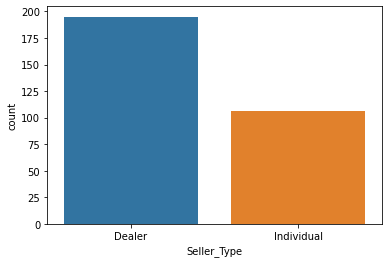

In [33]:
sns.countplot(df['Seller_Type'])

In [34]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

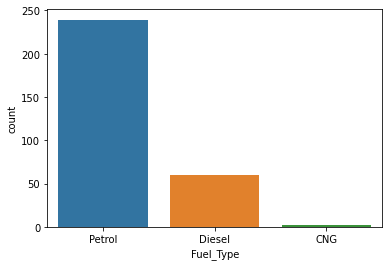

In [35]:
sns.countplot(df['Fuel_Type'])
plt.show()

AxesSubplot(0.125,0.125;0.133621x0.755)
AxesSubplot(0.285345,0.125;0.133621x0.755)
AxesSubplot(0.44569,0.125;0.133621x0.755)
AxesSubplot(0.606034,0.125;0.133621x0.755)


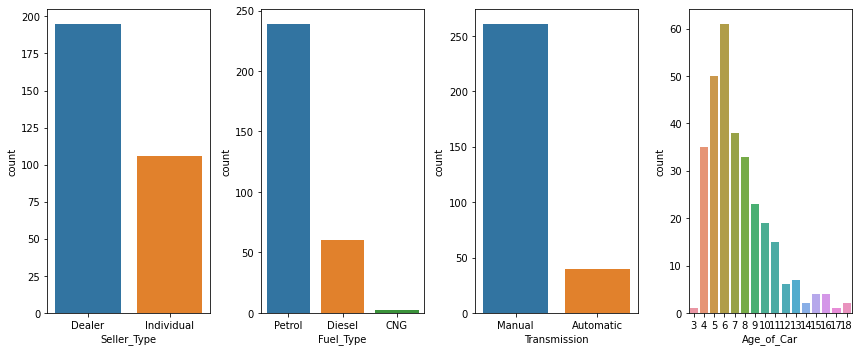

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,5,1)
print(sns.countplot(df['Seller_Type']))

plt.subplot(1,5,2)
print(sns.countplot(df['Fuel_Type']))

plt.subplot(1,5,3)
print(sns.countplot(df['Transmission']))

plt.subplot(1,5,4)
print(sns.countplot(df['Age_of_Car']))

plt.tight_layout()
plt.show()

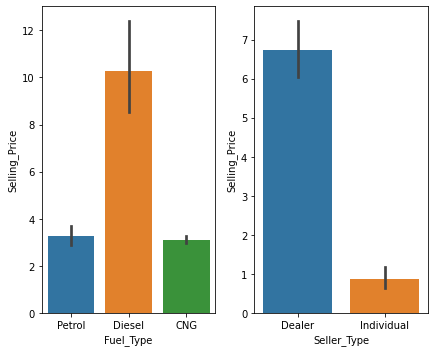

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,5,1)
sns.barplot(x='Fuel_Type' ,y='Selling_Price', data=df)

plt.subplot(1,5,2)
sns.barplot(x='Seller_Type' ,y='Selling_Price', data=df)

plt.tight_layout()

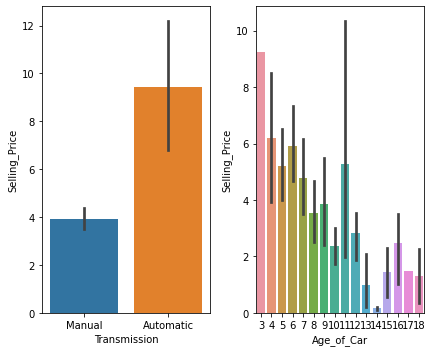

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,5,1)
sns.barplot(x='Transmission' ,y='Selling_Price', data=df)

plt.subplot(1,5,2)
sns.barplot(x='Age_of_Car' ,y='Selling_Price', data=df)

plt.tight_layout()

### Correlation using Heatmap()

In [39]:
df.corr() #matrix form #range -1 to +1

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age_of_Car,-0.236141,0.047584,0.524342,0.182104,1.000000


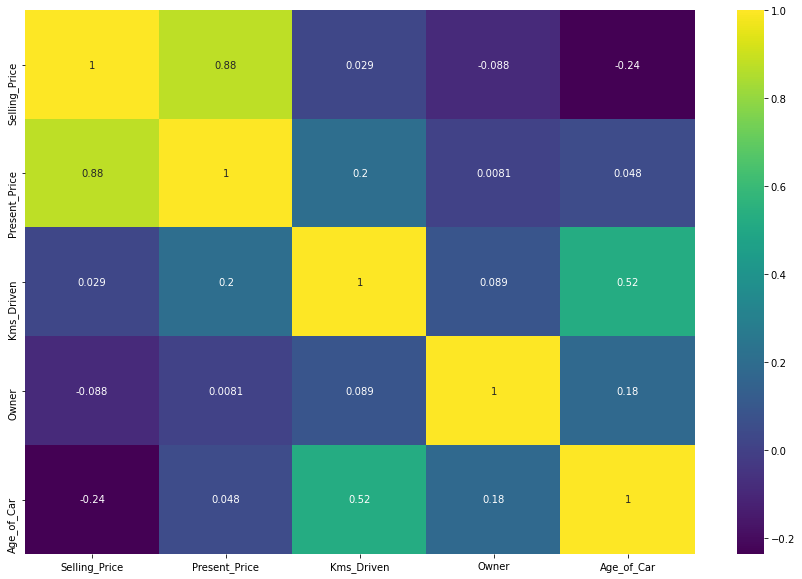

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='viridis', annot=True, cbar=True)
plt.show()

#### Observation : Present price is very important for predicting Selling price.

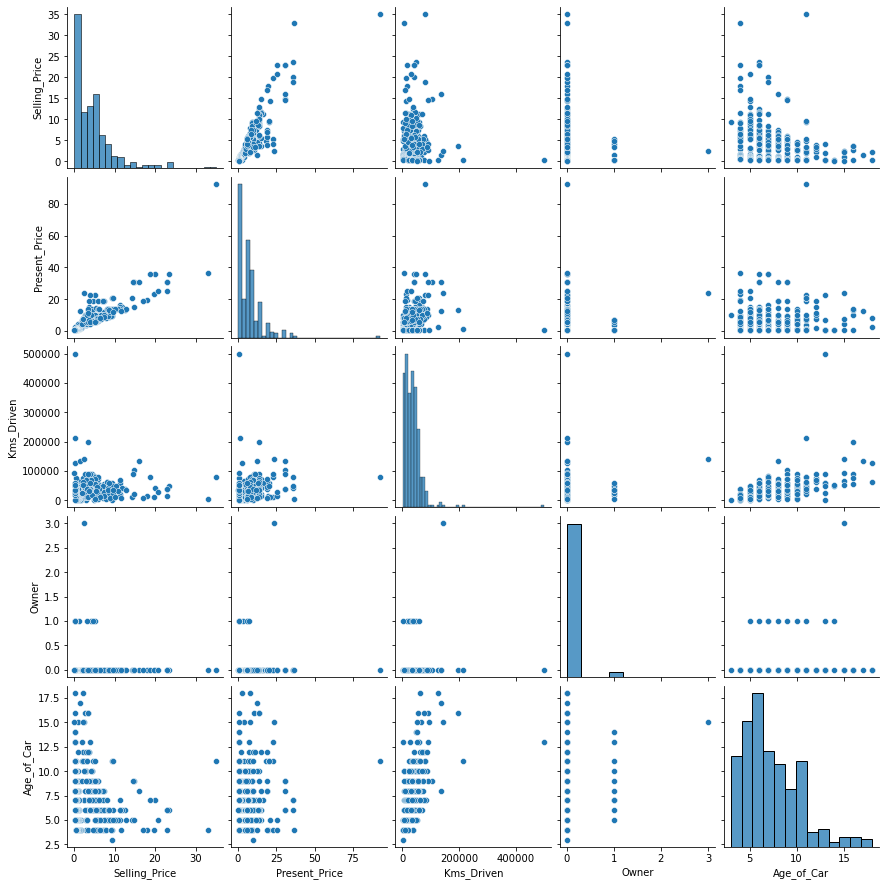

In [41]:
sns.pairplot(df)

### Data Preprocessing

In [42]:
df.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age_of_Car       0
dtype: int64

### Encoding Categorical columns into numerical

In [43]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [44]:
df.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Honda Dream Yuga           1
Activa 4g                  1
Hero Honda Passion Pro     1
Hero Glamour               1
Bajaj Pulsar  NS 200       1
Name: Car_Name, Length: 98, dtype: int64

In [45]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [46]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [47]:
df = pd.get_dummies(df, drop_first=True) #drop_first = to avoid dummy variable trap

In [48]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Dividing the dataset based on dependent and independent columns

In [49]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [50]:
x.head()

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [51]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Feature Importance

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [53]:
print(model.feature_importances_)

[0.33642563 0.03765395 0.00080231 0.07776103 0.2534333  0.01013009
 0.13116257 0.15263112]


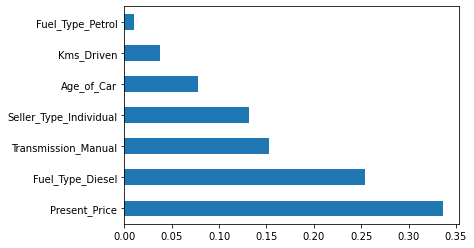

In [54]:
fi = pd.Series(model.feature_importances_, index=x.columns)
fi.nlargest(7).plot(kind='barh')
plt.show()

In [55]:
x.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Age_of_Car',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

### Splitting the dataset into training and test set

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [57]:
x_train.shape

(210, 8)

In [58]:
x_test.shape

(91, 8)

### Feature Scailing

In [59]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [61]:
x_train

array([[ 0.1567255 ,  0.03144633, -0.13519158, ...,  0.50742983,
        -0.73764331, -2.40295517],
       [-0.78770743, -0.71552676, -0.13519158, ...,  0.50742983,
         1.35566878,  0.41615425],
       [-0.78339002,  0.55107979, -0.13519158, ...,  0.50742983,
         1.35566878,  0.41615425],
       ...,
       [ 0.31862828,  0.22630888, -0.13519158, ..., -1.97071584,
        -0.73764331,  0.41615425],
       [-0.65710585,  0.1288776 , -0.13519158, ...,  0.50742983,
         1.35566878,  0.41615425],
       [ 0.09304373, -0.48169171, -0.13519158, ...,  0.50742983,
        -0.73764331,  0.41615425]])

In [62]:
x_test

array([[ 6.21926170e-01, -3.58278763e-01, -1.35191577e-01,
        -4.39910460e-01, -5.00000000e-01,  5.07429828e-01,
        -7.37643306e-01,  4.16154247e-01],
       [-7.51009463e-01, -9.10389311e-01, -1.35191577e-01,
        -9.26127285e-02, -5.00000000e-01,  5.07429828e-01,
         1.35566878e+00,  4.16154247e-01],
       [-3.67839534e-01,  6.80988152e-01, -1.35191577e-01,
         9.49280467e-01, -5.00000000e-01,  5.07429828e-01,
        -7.37643306e-01,  4.16154247e-01],
       [-7.43453999e-01, -1.12798582e+00, -1.35191577e-01,
        -1.13450592e+00, -5.00000000e-01,  5.07429828e-01,
         1.35566878e+00,  4.16154247e-01],
       [-2.19968322e-01, -5.53141309e-01, -1.35191577e-01,
        -1.13450592e+00, -5.00000000e-01,  5.07429828e-01,
        -7.37643306e-01,  4.16154247e-01],
       [ 1.83709293e-01,  2.26308877e-01, -1.35191577e-01,
         2.54685003e-01,  2.00000000e+00, -1.97071584e+00,
        -7.37643306e-01,  4.16154247e-01],
       [ 3.03535705e+00,  1.613546

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(x_test)

### r2_score

In [65]:
from sklearn.metrics import r2_score
r2_scorelr = r2_score(y_test, y_pred)

In [66]:
print(r2_scorelr)

0.8419440475697326


### Support Vector Regression

In [67]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [68]:
y_pred = svr.predict(x_test)

In [69]:
r2_scoresvr = r2_score(y_test, y_pred)

In [70]:
print(r2_scoresvr)

0.6426485226677181


In [71]:
svr = SVR(kernel='sigmoid', degree=2, gamma='auto')
svr.fit(x_train, y_train)

SVR(degree=2, gamma='auto', kernel='sigmoid')

In [72]:
y_pred = svr.predict(x_test)

In [73]:
r2_scoresvrm = r2_score(y_test, y_pred)

In [74]:
print(r2_scoresvrm)

0.4655974674401433


### Random Forrest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = random.predict(x_test)

In [77]:
r2_scorerf = r2_score(y_test, y_pred)

In [78]:
print(r2_scorerf)

0.9230457735351988


### Hyper Parameter Tuning for SVR - GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV
svr = SVR()

params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

gs = GridSearchCV(estimator=svr, param_grid = params, cv=10, n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [80]:
gs.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [81]:
svr = SVR(C=100, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)

SVR(C=100, gamma=0.01)

In [82]:
y_pred = svr.predict(x_test)

In [83]:
r2_scoresvrh = r2_score(y_test, y_pred)

In [84]:
print(r2_scoresvrh)

0.9410628773638373


### DataFrame for models and r2_scores:

In [85]:
pd.DataFrame({'model':['Linear Regression', 'Support Vector Regression', 'Random Forrest Regression'], 'R2 Score':[r2_scorelr, r2_scoresvrh, r2_scorerf]})

,model,R2 Score
0,Linear Regression,0.841944
1,Support Vector Regression,0.941063
2,Random Forrest Regression,0.923046


### Distribution Plot for SVR model which has 94.3% of accuracy

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

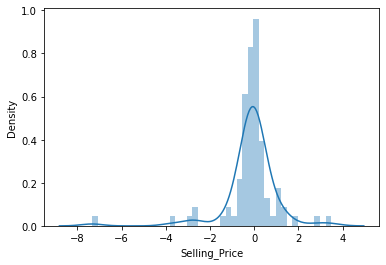

In [86]:
sns.distplot(y_test-y_pred)

### Scatter Plot for SVR

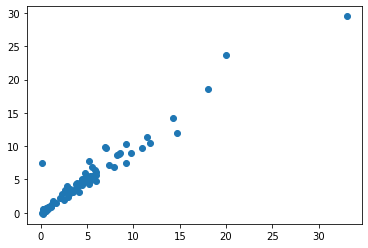

In [87]:
plt.scatter(y_test, y_pred)

### Thank You !!!